In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error,r2_score
sns.set_style(style="darkgrid")
import pandas_profiling as pp

In [ ]:
dataset= pd.read_csv("/kaggle/input/world-happiness/2019.csv")
dataset.head()

In [ ]:
len(dataset.columns)

In [ ]:
pp.ProfileReport(dataset)

## Pandas Profiling Library is one of the awesome ways in which you can get an intuition and summary of the dataset. The profile report suggests highly positive correlation between columns 
## 'GDP per capita','Social support','Healthy life expectancy',and 'Score'. 
## Also a highly negative correlation between 'Score' and 'Overall Rank'which makes sense.
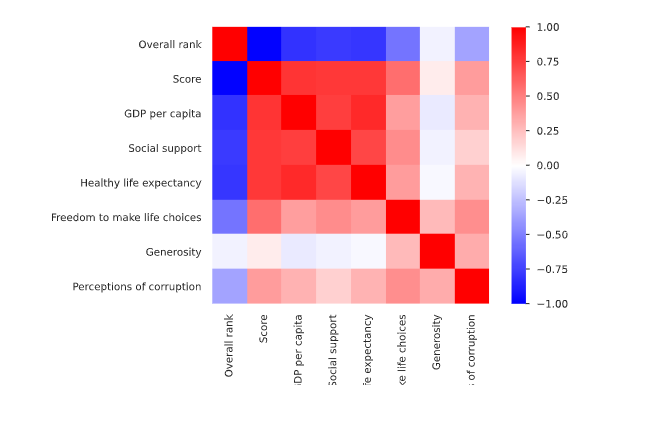

In [ ]:
j=1
cols=['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']
plt.figure(figsize=(20,20))
for i in cols:
    plt.subplot(3,2,j)
    j+=1
    sns.scatterplot(data=dataset,y="Score",x=str(i))
    

In [ ]:
dataset.corr()["Score"]

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
for i in ["GDP per capita","Social support","Healthy life expectancy"]:
    g = sns.relplot(x=i, y="Score", kind="line",data=dataset)

In [ ]:
plt.figure(figsize=(20,20))
k=1
for i in ["GDP per capita","Social support","Healthy life expectancy"]:
    plt.subplot(3,1,k)
    sns.regplot(x=i, y="Score", data=dataset);
    k+=1

In [ ]:
plt.figure(figsize=(10,10))
for i in ["GDP per capita","Social support","Healthy life expectancy"]:
    sns.regplot(x=i, y="Score", data=dataset);


# Assigning Independent columns to X and dependent target variable to y

In [ ]:
X=dataset[["GDP per capita","Social support","Healthy life expectancy"]]
y=dataset[['Score']]
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [ ]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_norm=mmscaler.fit_transform(X)
y_norm=mmscaler.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=TTS(X_norm,y_norm,train_size=0.8,random_state=45)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [ ]:
X_train[:,0:1]

In [ ]:
store={}
lr=LinearRegression()
lr=lr.fit(X_train,y_train)

In [ ]:
MSE=mean_squared_error(y_test,lr.predict(X_test))
R_SCORE=r2_score(y_test,lr.predict(X_test))
print("MSE : ",MSE)
print("R_SCORE : ",R_SCORE)
for k in range(3):
            plt.plot(X_test[:,k:k+1],lr.predict(X_test))
            plt.scatter(X_test[:,k:k+1],y_test,c="red")
            plt.title("MLR")
            plt.show()
print("  SLOPE OF LINE  = ",lr.coef_)
print("  INTERCEPT OF THE LINE  = ",lr.intercept_)

In [ ]:
plt.plot(,lr.predict(X_test))

In [ ]:
type(lr)

In [ ]:
# To predict
def happy_predict():
    for i in ["GDP per capita","Social support","Healthy life expectancy"]:
        print("\n Enter the amount of ",i," in your country : ")
        ss=float(input())
    return lr.coef_*ss+lr.intercept_
happy_predict()

In [ ]:
#link to the dataset : https://www.kaggle.com/unsdsn/world-happiness